In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import numpy as np

In [59]:
features = pd.read_csv("Expression/features_human_proteome_no_filtering.csv")
features.rename(columns = {'id':'UniprotID'}, inplace = True)
LP_pred = pd.read_csv("Expression/LHP_PREDICTIONS.tsv", sep='\t')
LP_pred.rename(columns = {'id':'UniprotID', 'prediction':'LHPpred'}, inplace = True)
Expression = pd.read_csv('Expression/ExpressionGenesAndUniprot.csv', index_col=0)
max_exp = Expression.groupby(['Gene','Gene_name', 'Uniprot_ID']).agg({'Tissue': lambda x: ",".join(x), 'NX':'max'}).rename({'NX' : 'max_NX'},axis=1).reset_index()
max_exp.rename(columns = {'Uniprot_ID':'UniprotID'}, inplace = True)
max_exp = max_exp.drop(["Tissue","Gene_name", "Gene"],axis=1 )
HP = features.merge(LP_pred, on='UniprotID', how='left')
HP = HP.merge(max_exp, on='UniprotID', how='left')
sol = pd.read_csv("SWI/SolubilityPredictions.csv",index_col=0)
agg = pd.read_csv("Aggregation/AggregationPredictions.csv",index_col=0)
SWI_data = pd.read_csv("SWI/DNASU_HUMAN.csv",index_col=0) 

HP = HP.merge(sol, on='UniprotID', how='left')
HP = HP.merge(agg, on='UniprotID', how='left')
HP.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

# df = sol.

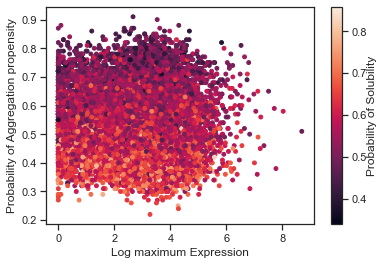

In [55]:
sns.set_palette("rocket")
sns.set(style=("ticks"))
marker_size=15
plt.scatter(np.log(HP['max_NX']+1),HP["prob_of_aggregation"] , marker_size, c=HP["prob_of_sol"])
plt.xlabel("Log maximum Expression")
plt.ylabel("Probability of Aggregation propensity")
cbar= plt.colorbar()
cbar.set_label("Probability of Solubility", labelpad=+1)
plt.savefig('Pred2Dplot.png',dpi=300, bbox_inches='tight')
plt.show()

In [61]:
# HP.loc[HP["max_NX"].idxmax()]
# HP.loc[HP["UniprotID"]=="P02808"]
# Expression.loc[Expression["Uniprot_ID"]=="P02808"]


# HP.loc[HP["prob_of_aggregation"].idxmax()]
# HP.loc[HP["UniprotID"]=="P48023"]
# Expression.loc[Expression["Uniprot_ID"]=="P48023"]


# HP.loc[HP["prob_of_aggregation"].idxmin()]
# HP.loc[HP["UniprotID"]=="Q8N357"]
Expression.loc[Expression["Uniprot_ID"]=="Q8N357"]
SWI_data.loc[SWI_data["UniprotID"]=="Q8N357"]

,Sequence,Binary_Solubility,id,Amino_acid_counts,Molecular_Weight,Flexibility,Aromaticity,Instability_index,Gravy_Score,Isoelectric_point,...,V,W,Y,Total_Residues,Proline_fraction,Cysteine_fraction,Turn_NPGS_fraction,UniprotID,Organism,HUMAN
